<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/USArrestsXObesityXEducationXTableRXCrosstablePython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns


In [2]:
df_obesity = pd.read_csv('https://visdatasets.github.io/datasets/higher_education_vs_obesity.csv')
df_obesity.head()

,State,BA Degree Percentage,Obesity Percentage,Obesity vs Higher Education
0,Alabama,24.0,35.7,More obesity than higher education
1,Alaska,28.8,31.4,More obesity than higher education
2,Arizona,28.0,29.0,More obesity than higher education
3,Arkansas,21.5,35.7,More obesity than higher education
4,California,32.0,25.0,More higher education than obesity


In [3]:
df_obesity.shape

(52, 4)

In [4]:
df_arrests = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv',index_col=0).reset_index()
df_arrests.rename(columns={'index':'State'},inplace=True)
df_arrests.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df = df_arrests.merge(df_obesity, how='outer', on='State')
# df.drop(columns=['Murder','Assault','Rape'],inplace=True)
df.drop(columns=['Assault','Obesity Percentage','Rape'],inplace=True)
df.head()

,State,Murder,UrbanPop,BA Degree Percentage,Obesity vs Higher Education
0,Alabama,13.2,58.0,24.0,More obesity than higher education
1,Alaska,10.0,48.0,28.8,More obesity than higher education
2,Arizona,8.1,80.0,28.0,More obesity than higher education
3,Arkansas,8.8,50.0,21.5,More obesity than higher education
4,California,9.0,91.0,32.0,More higher education than obesity


In [6]:
df.isnull().sum()

State                          0
Murder                         2
UrbanPop                       2
BA Degree Percentage           0
Obesity vs Higher Education    0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df[ df.columns[-1] ].value_counts()

More obesity than higher education    30
More higher education than obesity    20
Name: Obesity vs Higher Education, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop(columns=['State','Obesity vs Higher Education']))
X = scaler.transform(df.drop(columns=['State','Obesity vs Higher Education']))

In [10]:
from sklearn import metrics
from sklearn.cluster import KMeans

for n_clusters in range(2,11):
  clf = KMeans(n_clusters = n_clusters , random_state= 1984)  
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para 2 clusters:  0.304
Silhueta média para 3 clusters:  0.316
Silhueta média para 4 clusters:  0.301
Silhueta média para 5 clusters:  0.291
Silhueta média para 6 clusters:  0.286
Silhueta média para 7 clusters:  0.277
Silhueta média para 8 clusters:  0.295
Silhueta média para 9 clusters:  0.306
Silhueta média para 10 clusters:  0.304


In [15]:
# Configura e instancia o estimador 
clf = KMeans(n_clusters = 3 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X) # somente os atributos Murder e UrbanPop

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[0 0 1 0 1 1 1 1 0 0 1 2 1 0 2 1 0 0 2 1 1 0 1 0 0 2 2 0 2 1 0 1 0 2 0 0 1
 1 1 0 2 0 0 1 2 1 1 2 2 0]
[[ 0.8829393  -0.20168488 -0.77619952]
 [-0.30360231  0.8071068   0.88990416]
 [-1.08094018 -1.02739379 -0.12583534]]


In [16]:
df['Cluster'] = labels

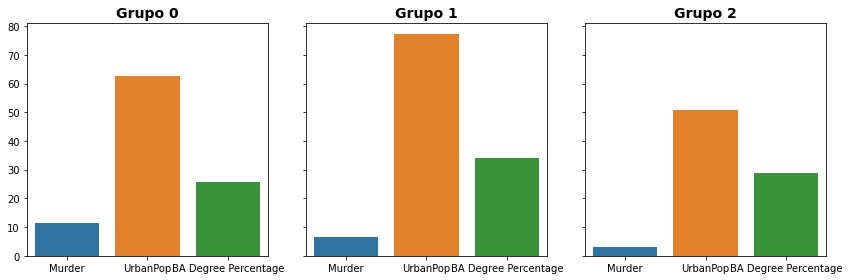

In [18]:
g = pd.DataFrame( df.groupby('Cluster').mean() ).reset_index()

fig, ax = plt.subplots(1,len(g),figsize=(12,4),sharey=True)

for i in range(len(g)):
  sns.barplot(data=g[g.Cluster==i].drop(columns='Cluster'),ax=ax[i])
  ax[i].set_title('Grupo ' + str(i), fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

In [19]:
cross = pd.crosstab(index=df['Cluster'], 
                             columns=df['Obesity vs Higher Education'],
                             margins=True)

cross

Obesity vs Higher Education,More higher education than obesity,More obesity than higher education,All
Cluster,,,
0,1,19,20
1,16,3,19
2,3,8,11
All,20,30,50
